# Comparison with Observations: 
## Mean Absolute Percent Error and Normilized Forecast Metric Calculations

### Content


1. [The load of packages, modules, and data](#1-load-of-packages-modules-and-data)

2. [Comparison of histograms](#2-comparison-of-histograms)

3. [Seasonal and Monthly 95 percentage level](#3-seasonal-and-monthly-95-percentage-level)

4. [Mean comparison](#4-mean-comparison)

5. [Bias of a different models]()

[Go to the end of file](#the-end)

#

## 1. The load of packages, modules, and data

In [1]:
import sys
from aqua import Reader
sys.path.insert(0, '../../')
from tropical_rainfall import Tropical_Rainfall

FDB5 binary library not present on system, disabling FDB support.


#### ICON, ngc3028, lra

In [2]:
reader          = Reader(model="ICON", exp="ngc3028", source="lra-r100-monthly")
icon_ngc3028    = reader.retrieve()

#### IFS, tco2559-ng5, lra

In [3]:
reader              = Reader(model="IFS", exp="tco2559-ng5", source="lra-r100-monthly") 
ifs_tco2559_ng5     = reader.retrieve()

#### IFS, tco1279-orca025-cycle3, lra

In [4]:
reader                  = Reader(model="IFS", exp="tco1279-orca025-cycle3", source="lra-r100-monthly")
ifs_tco1279_orca025     = reader.retrieve()

#### MSWEP, monthly 

In [5]:
reader                  = Reader(model="MSWEP", exp="past", source="monthly", regrid = "r100")
mswep_mon               = reader.retrieve(regrid=True)

#### Initialization of the diagnostic

In [6]:
diag = Tropical_Rainfall(trop_lat=15,  num_of_bins = 20, first_edge = 0, width_of_bin = 1*10**(-3)/40)

## 2. Comparison of histograms

In [7]:
path_to_netcdf = "/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/"
path_to_pdf    = "/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/PDF/"

In [8]:
hist_icon_ngc3028 = diag.histogram(icon_ngc3028, path_to_histogram=path_to_netcdf, name_of_file="icon_ngc3028_lra_r100_monthly")

/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(
2023-07-06 20:21:29 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/ already exists


In [9]:
hist_ifs_tco2559_ng5 = diag.histogram(ifs_tco2559_ng5, path_to_histogram=path_to_netcdf, name_of_file="ifs_tco2559_ng5_lra_r100_monthly")

/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(
2023-07-06 20:21:30 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/ already exists


In [10]:
hist_ifs_tco1279_orca025 = diag.histogram(ifs_tco1279_orca025, path_to_histogram=path_to_netcdf, name_of_file="ifs_tco2559_ng5_lra_r100_monthly")

/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(
2023-07-06 20:21:33 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/ already exists


In [11]:
hist_mswep_mon = diag.histogram(mswep_mon, path_to_histogram=path_to_netcdf, name_of_file="mswep_past_monthly_r100")

/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(
2023-07-06 20:21:53 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/ already exists


#### Units of precipitation: mm  day**-1

2023-07-06 20:25:34 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/PDF/ already exists


{<Axes: title={'center': 'Monthly, 1 degree res (100km) res'}, xlabel='Precipitation, [mm/day]', ylabel='PDF'>,
 <Figure size 640x400 with 1 Axes>}

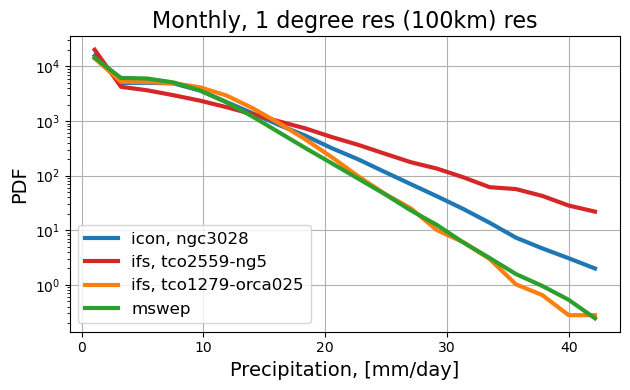

In [13]:
add = diag.histogram_plot(hist_icon_ngc3028,    figsize=0.8, 
                new_unit="mm/day",
                legend='icon, ngc3028')
diag.histogram_plot(hist_ifs_tco2559_ng5,       add = add,  color ='tab:red', 
                new_unit="mm/day",
                legend='ifs, tco2559-ng5') 
diag.histogram_plot(hist_ifs_tco1279_orca025,   add = add,  color ='tab:orange', 
                new_unit="mm/day",
                legend='ifs, tco1279-orca025') 
diag.histogram_plot(hist_mswep_mon,             add = add,  color ='tab:green', 
                new_unit="mm/day",
                legend='mswep',
                plot_title='Monthly, 1 degree res (100km) res', loc='lower left', 
                path_to_pdf=path_to_pdf, 
                name_of_file='icon_ngc3028_ifs_tco2559_ng5_ifs_tco1279_orca025_mswep_lra_r100_monthly_comparison')

## 3. Seasonal and monthly 95 percentage level 

### Calculations of a threshold precipitation value in a different units 

In [13]:
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

#### By default, the function calculates the 95 percent level with 10% relative error and returns 
 - threshold value of precipitation 
 - units of precipitation 
 - final value of percentage level (including error)

In [14]:
diag.get_95percent_level(icon_ngc3028)

(0.0001875, 'kg m**-2 s**-1', 0.9453451720785118)

Users can set the relative error on a percentage level

In [15]:
diag.get_95percent_level(ifs_tco2559_ng5, rel_error = 0.10)

(0.00024375000000000004, 'kg m**-2 s**-1', 0.9492787519437667)

User can modify the units of the threshold precipitation value

In [16]:
diag.get_95percent_level(ifs_tco1279_orca025, new_unit='m/s')

(2.0078124999999998e-07, 'm/s', 0.947272781986912)

User can also modify the default percentage level 

In [17]:
diag.get_95percent_level(mswep_mon, value=0.9)

(0.00017597656249999997, 'kg m**-2 s**-1', 0.8972933138848432)

### Seasonal Plot of 60 percent level

/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(
/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(
/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(
/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  war

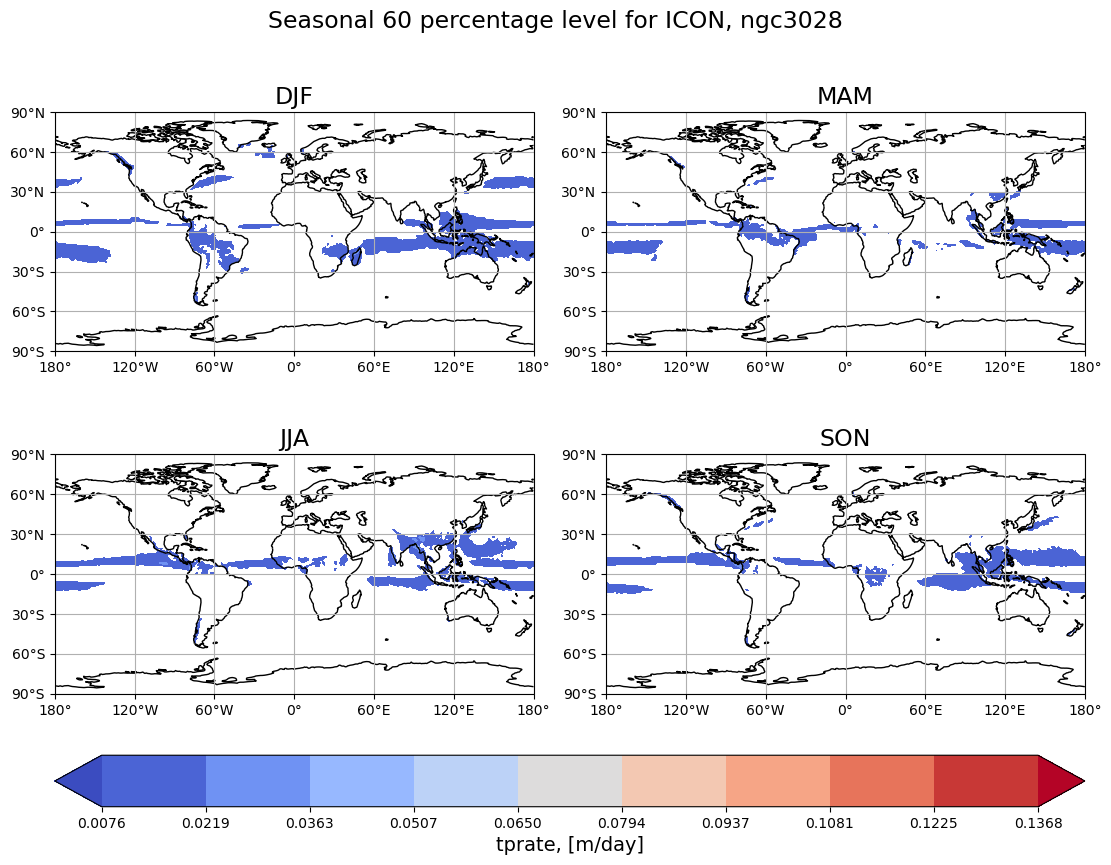

In [5]:
diag = Tropical_Rainfall(trop_lat=15,  num_of_bins = 20, first_edge = 0, width_of_bin = 1*10**(-3)/40)
diag.plot_095level(icon_ngc3028, new_unit='m/day',  trop_lat=90, value=0.6, 
                   plot_title='Seasonal 60 percentage level for ICON, ngc3028',
                   path_to_pdf=path_to_pdf, name_of_file='icon_ngc3028_lra_r100_monthly_60percent_level')

## 4. Mean comparison

### 4.1 Along longitude

2023-07-06 20:26:02 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/PDF/ already exists


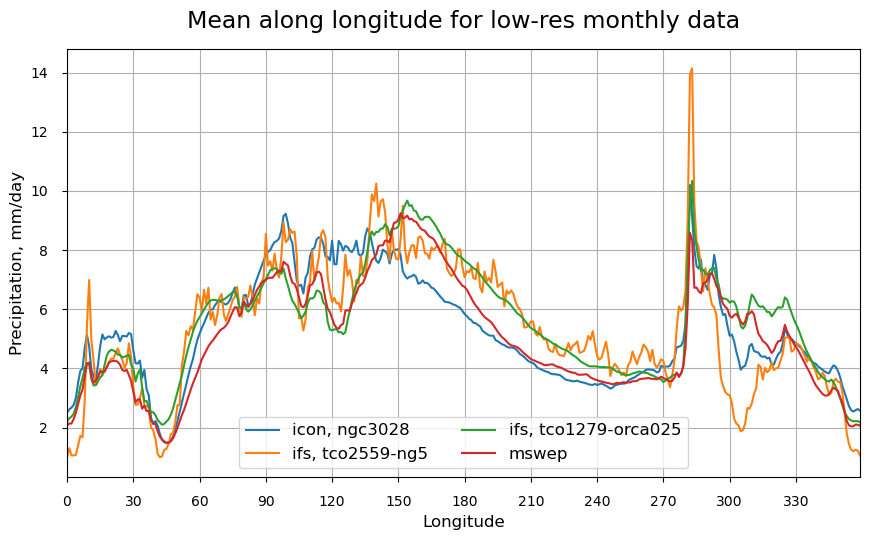

In [14]:
diag.trop_lat = 10
add = diag.mean_and_median_plot(icon_ngc3028,                   coord='lon',  
                                legend='icon, ngc3028',   color='tab:blue', figsize=1.1,    new_unit = 'mm/day' )
add = diag.mean_and_median_plot(ifs_tco2559_ng5,             fig=add,    coord='lon',  
                                legend='ifs, tco2559-ng5',    color='tab:orange',           new_unit = 'mm/day')

add = diag.mean_and_median_plot(ifs_tco1279_orca025,       fig=add,    coord='lon',  
                                legend='ifs, tco1279-orca025', color='tab:green',           new_unit = 'mm/day')

add = diag.mean_and_median_plot(mswep_mon,       fig=add,    coord='lon',  
                                legend='mswep', color='tab:red', loc='lower center',        new_unit = 'mm/day',
                                plot_title='Mean along longitude for low-res monthly data',
                                path_to_pdf=path_to_pdf, 
                                name_of_file='icon_ngc3028_ifs_tco2559_ng5_ifs_tco1279_orca025_mswep_lra_r100_monthly_comparison_along_lon')

### 4.2 Along latitude

2023-07-06 16:05:41 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/PDF/ already exists


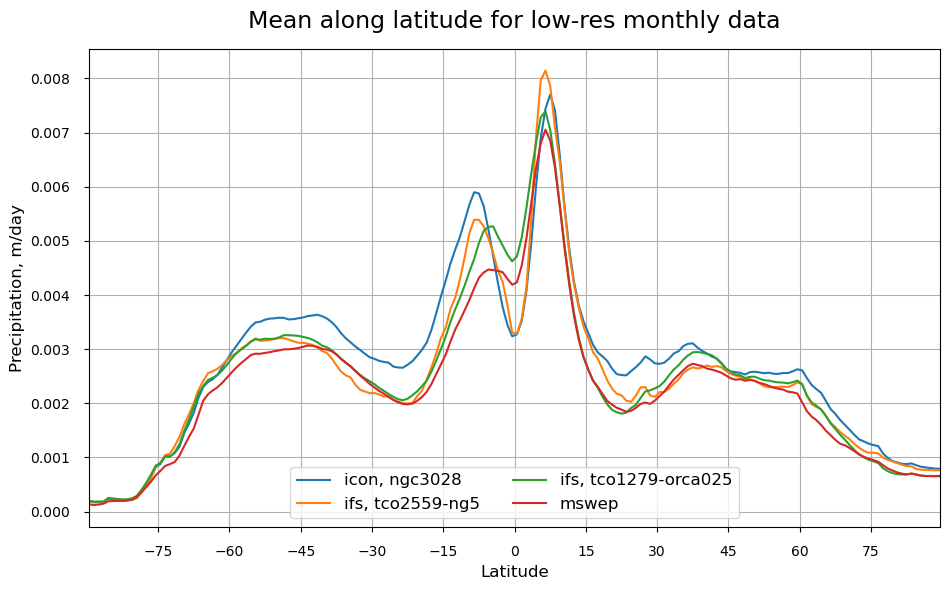

In [18]:
diag.trop_lat = 90
add = diag.mean_and_median_plot(icon_ngc3028,                           coord='lat',  
                                legend='icon, ngc3028',         color='tab:blue',       figsize=1.2, new_unit = 'm/day' )
add = diag.mean_and_median_plot(ifs_tco2559_ng5,            fig=add,    coord='lat',  
                                legend='ifs, tco2559-ng5',      color='tab:orange',     new_unit = 'm/day' )

add = diag.mean_and_median_plot(ifs_tco1279_orca025,        fig=add,    coord='lat',  
                                legend='ifs, tco1279-orca025',  color='tab:green',      new_unit = 'm/day' )

add = diag.mean_and_median_plot(mswep_mon,                  fig=add,    coord='lat',  
                                legend='mswep',                 color='tab:red',        loc='lower center', new_unit = 'm/day', 
                                plot_title='Mean along latitude for low-res monthly data',
                                path_to_pdf=path_to_pdf, name_of_file='icon_ngc3028_ifs_tco2559_ng5_ifs_tco1279_orca025_mswep_lra_r100_monthly_comparison_along_lat')

## 5.. Calculation of a bias 

2023-07-06 16:02:49 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/PDF/ already exists


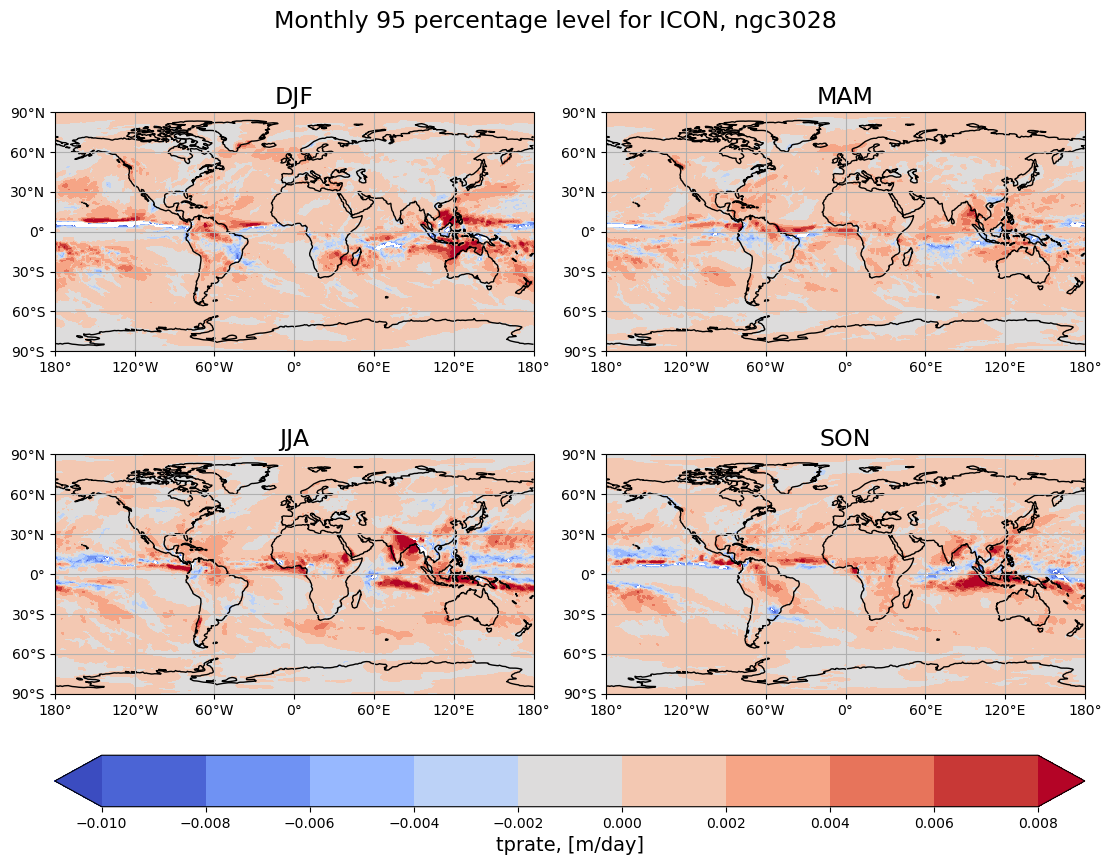

In [11]:
diag.plot_bias(icon_ngc3028, dataset_2 = ifs_tco2559_ng5, seasons=True, new_unit='m/day',  trop_lat=90, vmin=-0.01, vmax=0.01,
                    plot_title='Monthly 95 percentage level for ICON, ngc3028',
                    path_to_pdf=path_to_pdf, name_of_file='icon_ngc3028_ifs_tco2559_ng5_lra_r100_monthly_bias')

#

##### The end